<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Store_Analyst_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
df=pd.read_csv ('/content/Stores (1).csv')

In [54]:
df.head(20)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [56]:
df.shape

(896, 5)

In [57]:
df.duplicated().sum()

0

In [58]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [59]:
df.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [61]:
df['Store_Area'].value_counts()

1439    5
1513    5
1458    5
1440    5
1539    5
       ..
1509    1
1339    1
1590    1
2169    1
1387    1
Name: Store_Area, Length: 583, dtype: int64

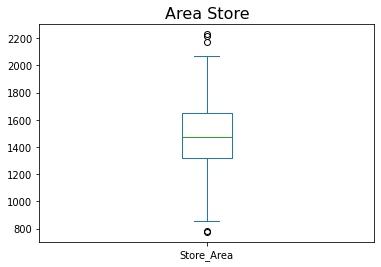

In [63]:
df['Store_Area'].plot(kind='box')
plt.title('Area Store', size=16)
plt.show()

In [65]:
Q1 = df['Store_Area'].quantile(0.25) # Finding Q1 value
Q3 = df['Store_Area'].quantile(0.75) # Finding Q3 value
IQR = Q3-Q1 # Calculating IQR
print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR Store Area = ', IQR)

Q1 =  1316.75
Q3 =  1653.5
IQR Store Area =  336.75


In [66]:
nilai_min = df['Store_Area'].min() # Finding min.value
nilai_max = df['Store_Area'].max() # Finding max.value
 
min_IQR = Q1 - 1.5 * IQR # Calculating min. IQR
max_IQR = Q3 + 1.5 * IQR # Calculating max. IQR
 
# Conditional to find low outlier
if (nilai_min < min_IQR): 
 print('Low outlier is found <', min_IQR)
 # Showing low outlier index 
 print('Low Outlier Index :', list(df[df['Store_Area'] < min_IQR].index)) 
 
# Conditional to find high outlier
if (nilai_max > max_IQR):
 print('High outlier is found >', max_IQR)
 # Showing high outlier index 
 print('High outlier Index : ', list(df[df['Store_Area'] > max_IQR].index)) 

Low outlier is found < 811.625
Low Outlier Index : [158, 865]
High outlier is found > 2158.625
High outlier Index :  [91, 466, 540]


In [67]:
df=df.drop(df[df.Store_Area > 2158.625].index, axis=0)

In [68]:
df=df.drop(df[df.Store_Area < 811.625].index, axis=0)

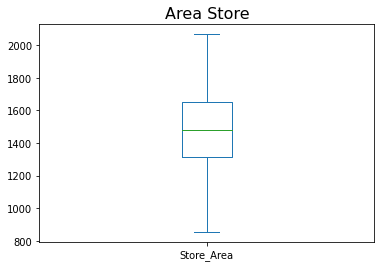

In [69]:
df['Store_Area'].plot(kind='box')
plt.title('Area Store', size=16)
plt.show()

In [70]:
df.shape

(891, 5)

In [71]:
df['Daily_Customer_Count'].value_counts()

670     19
680     17
760     17
860     15
790     15
        ..
130      1
1390     1
1300     1
10       1
140      1
Name: Daily_Customer_Count, Length: 130, dtype: int64

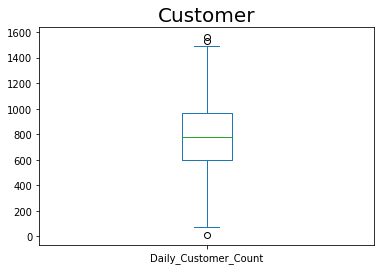

In [72]:
df['Daily_Customer_Count'].plot(kind='box')
plt.title('Customer', size=20)
plt.show()

In [73]:
Q1_cs = df['Daily_Customer_Count'].quantile(0.25) # Finding Q1 value
Q3_cs = df['Daily_Customer_Count'].quantile(0.75) # Finding Q3 value
IQR_cs = Q3_cs-Q1_cs # Calculating IQR
print('Q1_cs = ', Q1_cs)
print('Q3_cs = ', Q3_cs)
print('IQR Customer = ', IQR_cs)

Q1_cs =  600.0
Q3_cs =  970.0
IQR Customer =  370.0


In [75]:
nilai_min_cs = df['Daily_Customer_Count'].min() # Finding min.value
nilai_max_cs = df['Daily_Customer_Count'].max() # Finding max.value
 
min_IQR_cs = Q1_cs - 1.5 * IQR_cs # Calculating min. IQR
max_IQR_cs = Q3_cs + 1.5 * IQR_cs # Calculating max. IQR
 
# Conditional to find low outlier
if (nilai_min_cs < min_IQR_cs): 
 print('Low outlier is found <', min_IQR_cs)
 # Showing low outlier index 
 print('Low Outlier Index :', list(df[df['Daily_Customer_Count'] < min_IQR_cs].index)) 
 
# Conditional to find high outlier
if (nilai_max_cs> max_IQR_cs):
 print('High outlier is found >', max_IQR_cs)
 # Showing high outlier index 
 print('High outlier Index : ', list(df[df['Daily_Customer_Count'] > max_IQR_cs].index))

Low outlier is found < 45.0
Low Outlier Index : [39]
High outlier is found > 1525.0
High outlier Index :  [349, 848]


In [76]:
df=df.drop(df[df.Store_Area > 2158.625].index, axis=0)

In [77]:
df=df.drop(df[df.Daily_Customer_Count>1525.0].index,axis=0)

In [78]:
df=df.drop(df[df.Daily_Customer_Count<45.0].index,axis=0)

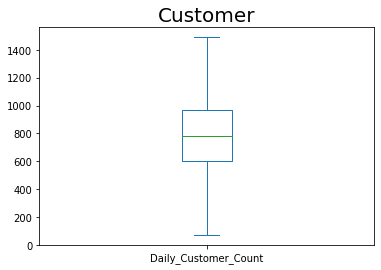

In [79]:
df['Daily_Customer_Count'].plot(kind='box')
plt.title('Customer', size=20)
plt.show()

In [80]:
df.shape

(888, 5)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              888 non-null    int64
 1   Store_Area            888 non-null    int64
 2   Items_Available       888 non-null    int64
 3   Daily_Customer_Count  888 non-null    int64
 4   Store_Sales           888 non-null    int64
dtypes: int64(5)
memory usage: 41.6 KB


In [82]:
df.head(5)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


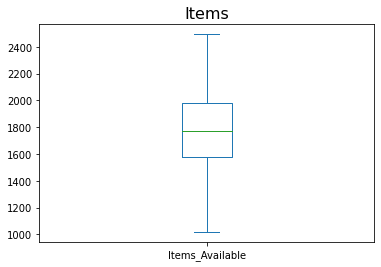

In [83]:
df['Items_Available'].plot(kind="box")
plt.title('Items', size=16)
plt.show()

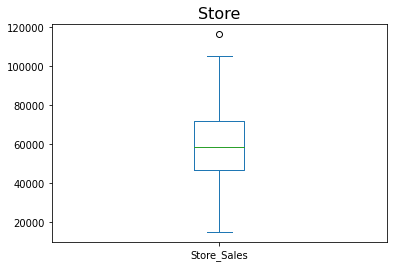

In [84]:
df['Store_Sales'].plot(kind='box')
plt.title('Store', size=16)
plt.show()

In [85]:
Q1_s = df['Store_Sales'].quantile(0.25) # Finding Q1 value
Q3_s = df['Store_Sales'].quantile(0.75) # Finding Q3 value
IQR_s = Q3_s-Q1_s # Calculating IQR
print('Q1_s = ', Q1_s)
print('Q3_s = ', Q3_s)
print('IQR Store = ', IQR_s)

Q1_s =  46610.0
Q3_s =  71872.5
IQR Store =  25262.5


In [86]:
nilai_max_s = df['Store_Sales'].max() # Finding max.value
max_IQR_s = Q3_s + 1.5 * IQR_s # Calculating max. IQR

In [87]:
# Conditional to find high outlier
if (nilai_max_s> max_IQR_s):
 print('High outlier is found >', max_IQR_s)
 # Showing high outlier index 
 print('High outlier Index : ', list(df[df['Store_Sales'] > max_IQR_s].index))

High outlier is found > 109766.25
High outlier Index :  [649]


In [88]:
df=df.drop(df[df.Store_Sales>110000].index,axis=0)

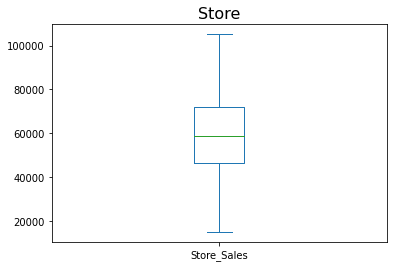

In [89]:
df['Store_Sales'].plot(kind='box')
plt.title('Store', size=16)
plt.show()

In [90]:
df.reset_index(inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   index                 887 non-null    int64
 1   Store ID              887 non-null    int64
 2   Store_Area            887 non-null    int64
 3   Items_Available       887 non-null    int64
 4   Daily_Customer_Count  887 non-null    int64
 5   Store_Sales           887 non-null    int64
dtypes: int64(6)
memory usage: 41.7 KB


In [92]:
df.shape

(887, 6)

In [93]:
df=df.drop("index", axis=1)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              887 non-null    int64
 1   Store_Area            887 non-null    int64
 2   Items_Available       887 non-null    int64
 3   Daily_Customer_Count  887 non-null    int64
 4   Store_Sales           887 non-null    int64
dtypes: int64(5)
memory usage: 34.8 KB


In [96]:
df_f = df.drop('Store_Sales', axis=1)
df_t = df['Store_Sales']
y=df_t

In [99]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              887 non-null    int64
 1   Store_Area            887 non-null    int64
 2   Items_Available       887 non-null    int64
 3   Daily_Customer_Count  887 non-null    int64
dtypes: int64(4)
memory usage: 27.8 KB


In [102]:
nums=['Store_Area','Items_Available','Daily_Customer_Count']

In [103]:
df[nums].describe() 

,Store_Area,Items_Available,Daily_Customer_Count
count,887.000000,887.000000,887.000000
mean,1484.437430,1780.871477,785.490417
std,243.905688,292.307040,262.671553
min,854.000000,1018.000000,70.000000
25%,1317.500000,1577.500000,600.000000
50%,1477.000000,1773.000000,780.000000
75%,1650.000000,1981.500000,970.000000
max,2067.000000,2493.000000,1490.000000


In [104]:
df_f=df[nums]

In [105]:
df_f.head(5)

,Store_Area,Items_Available,Daily_Customer_Count
0,1659,1961,530
1,1461,1752,210
2,1340,1609,720
3,1451,1748,620
4,1770,2111,450


In [106]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(df_f).transform(df_f.astype(float))
X[0:10]

array([[ 0.71610078,  0.6165782 , -0.97320991],
       [-0.09614639, -0.09882679, -2.19214866],
       [-0.59251967, -0.58831441, -0.24946502],
       [-0.13716898, -0.11251875, -0.63038338],
       [ 1.17145148,  1.13002675, -1.2779446 ],
       [-0.17408931, -0.1638636 , -0.09709768],
       [ 0.23613654,  0.26401019,  0.93138189],
       [-0.91659809, -0.93745942,  0.89329006],
       [-1.61808429, -1.57413562, -0.40183237],
       [-1.8642198 , -1.86851279,  1.31230025]])

In [107]:
features=['Store_Area','Items_Available','Daily_Customer_Count']
df_f1 = pd.DataFrame(data=X, columns=features)
df_f1.head(10)

,Store_Area,Items_Available,Daily_Customer_Count
0,0.716101,0.616578,-0.973210
1,-0.096146,-0.098827,-2.192149
2,-0.592520,-0.588314,-0.249465
3,-0.137169,-0.112519,-0.630383
4,1.171451,1.130027,-1.277945
5,-0.174089,-0.163864,-0.097098
6,0.236137,0.264010,0.931382
7,-0.916598,-0.937459,0.893290
8,-1.618084,-1.574136,-0.401832
9,-1.864220,-1.868513,1.312300


In [108]:
df_corr=df_f.corr() #We have to find value > 0.5 based on table below
df_corr

,Store_Area,Items_Available,Daily_Customer_Count
Store_Area,1.000000,0.998838,-0.036175
Items_Available,0.998838,1.000000,-0.035387
Daily_Customer_Count,-0.036175,-0.035387,1.000000


In [109]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 540 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 8.0 MB/s 
     |████████████████████████████████| 98 kB 8.9 MB/s 
     |████████████████████████████████| 8.8 MB 62.5 MB/s 
     |████████████████████████████████| 468 kB 64.5 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=82ed12bce4c525e5e7ebbc3e15971f9f4558d4b5f613dbcb2a34b3d5a5f08461
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [110]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [111]:
_,p=calculate_bartlett_sphericity(df_f) # p vaue is 2.71 -128 < 0.05
print('p value:',p)

p value: 0.0


In [ ]:
F_A=FactorAnalyzer()
F_A.fit(df_f)